In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [3]:
ls gdrive/

'My Drive'/


In [4]:
import keras

keras.__version__

'2.3.1'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [0]:
from keras import Sequential
from keras.layers import Dense, Activation

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [0]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [7]:
import numpy as np
np.__version__

'1.18.4'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [0]:
#########################코드########################
white_wine = pd.read_csv('./gdrive/My Drive/datamining/winequality-white.csv')
red_wine = pd.read_csv('./gdrive/My Drive/datamining/winequality-red.csv')
#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [9]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


데이터 분석 - white wine

In [49]:
cnt=np.zeros(11)

for i in range(len(white_wine)):
  q=int(white_wine.iloc[i].quality)
  cnt[q]+=1;
  
print(cnt)

[   0.    0.    0.   20.  163. 1457. 2198.  880.  175.    5.    0.]


In [10]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


데이터 분석 - Red wine


In [50]:
cnt=np.zeros(11)

for i in range(len(red_wine)):
  q=int(red_wine.iloc[i].quality)
  cnt[q]+=1;
  
print(cnt)

[  0.   0.   0.  10.  53. 681. 638. 199.  18.   0.   0.]


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [11]:
white_wine.iloc[0]

fixed acidity             7.000
volatile acidity          0.270
citric acid               0.360
residual sugar           20.700
chlorides                 0.045
free sulfur dioxide      45.000
total sulfur dioxide    170.000
density                   1.001
pH                        3.000
sulphates                 0.450
alcohol                   8.800
quality                   6.000
Name: 0, dtype: float64

In [12]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [0]:
#####################################################
from sklearn.model_selection import train_test_split
def generate_data(df, t_r):
    X= pd.DataFrame(df.drop(columns="quality"))
    Y=pd.DataFrame(df, columns=['quality'])
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=t_r, random_state=1)

    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [0]:
x_train_white, y_train_white, x_test_white, y_test_white = generate_data(white_wine, 0.7)

x_train_red, y_train_red, x_test_red, y_test_red = generate_data(red_wine, 0.7)

작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [15]:
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.optimizers import SGD

n_in=11  # input dimension
n_hiddens=32 # hidden layer 당 32개의 node를 가짐
n_out=11 # output dimension (0~10)

model = Sequential()

model.add(layers.Dense(units=n_hiddens,input_dim=n_in, activation='relu'))
model.add(layers.Dense(units=n_hiddens,activation='relu'))
model.add(layers.Dense(units=n_hiddens,activation='relu'))
model.add(layers.Dense(units=n_out,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 200

# White Wine Classifier
hist1=model.fit(x_train_white, y_train_white, epochs=epochs, batch_size=batch_size)
test_loss, test_acc = model.evaluate(x_test_white,y_test_white)
print("White Wine")
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

#Red Wine Classifier
hist2=model.fit(x_train_red, y_train_red, epochs=epochs, batch_size=batch_size)
test_loss, test_acc = model.evaluate(x_test_red,y_test_red)
print("\nRed Wine")
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

Epoch 1/100
1469/1469 [==============================] - 2s 1ms/step - loss: 8.7090 - accuracy: 0.2764
Epoch 2/100
1469/1469 [==============================] - 0s 16us/step - loss: 4.5235 - accuracy: 0.4323
Epoch 3/100
1469/1469 [==============================] - 0s 18us/step - loss: 2.9419 - accuracy: 0.3445
Epoch 4/100
1469/1469 [==============================] - 0s 17us/step - loss: 1.9331 - accuracy: 0.3125
Epoch 5/100
1469/1469 [==============================] - 0s 15us/step - loss: 1.6925 - accuracy: 0.4023
Epoch 6/100
1469/1469 [==============================] - 0s 15us/step - loss: 1.4658 - accuracy: 0.3131
Epoch 7/100
1469/1469 [==============================] - 0s 16us/step - loss: 1.3941 - accuracy: 0.3921
Epoch 8/100
1469/1469 [==============================] - 0s 15us/step - loss: 1.3701 - accuracy: 0.4098
Epoch 9/100
1469/1469 [==============================] - 0s 16us/step - loss: 1.3449 - accuracy: 0.3785
Epoch 10/100
1469/1469 [==============================] - 0s 16us

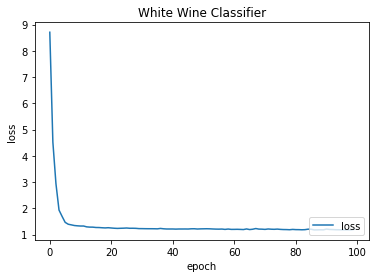

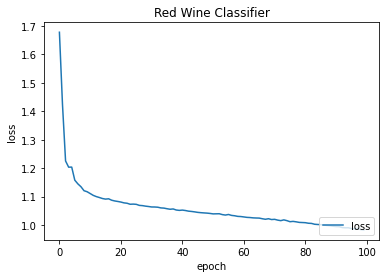

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('White Wine Classifier')
plt.plot(hist1.history['loss'], label='loss')
#plt.plot(hist.history['accuracy'], label='acuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

plt.title('Red Wine Classifier')
plt.plot(hist2.history['loss'], label='loss')
#plt.plot(hist.history['accuracy'], label='acuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [0]:
# Normalization
def normalization(x_train, x_test):
  minval=[]
  maxval=[]
  for i in range(11):
    minval.append(min(x_train[:,i]))
    maxval.append(max(x_train[:,i]))

  for i in range(len(x_train)):
    for j in range(11):
      x_train[i][j]=(x_train[i][j]-minval[j])/(maxval[j]-minval[j])

  for i in range(len(x_test)):
    for j in range(11):
      x_test[i][j]=(x_test[i][j]-minval[j])/(maxval[j]-minval[j])    

  return x_train, x_test

In [0]:
x_train_white, y_train_white, x_test_white, y_test_white = generate_data(white_wine, 0.7)
x_train_white, x_test_white = normalization(x_train_white,x_test_white)

x_train_red, y_train_red, x_test_red, y_test_red = generate_data(red_wine, 0.7)
x_train_red, x_test_red = normalization(x_train_red,x_test_red)

In [0]:
# label을 one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_white = to_categorical(y_train_white,11);
y_test_white = to_categorical(y_test_white,11);
y_train_red = to_categorical(y_train_red,11);
y_test_red = to_categorical(y_test_red,11);

In [101]:
import numpy as np
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import optimizers
from keras.layers import BatchNormalization, Dropout

n_in=11
n_out=11
p_keep=0.5 # 드롭아웃 확률의 비율

model = Sequential()

model.add(layers.Dense(units=512,input_dim=n_in, activation='relu'))
model.add(Dropout(p_keep))
model.add(BatchNormalization())  # Internal Covariate Shift 해결 - 각 layer이나 activation마다 input의 distribution이 달라지는 현상
model.add(layers.Dense(units=256,activation='relu'))
model.add(Dropout(p_keep))
model.add(BatchNormalization())
model.add(layers.Dense(units=128,activation='relu'))
model.add(Dropout(p_keep))
model.add(BatchNormalization())
model.add(layers.Dense(units=n_out,activation='softmax'))

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

epochs = 100
batch_size =100

# White Wine Classifier
hist1=model.fit(x_train_white, y_train_white, epochs=epochs, batch_size=batch_size)
test_loss, test_acc = model.evaluate(x_test_white,y_test_white)
print("White Wine")
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

#Red Wine Classifier
hist2=model.fit(x_train_red, y_train_red, epochs=epochs, batch_size=batch_size)
test_loss, test_acc = model.evaluate(x_test_red,y_test_red)
print("\nRed Wine")
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

Epoch 1/100
1469/1469 [==============================] - 0s 286us/step - loss: 3.0312 - accuracy: 0.1014
Epoch 2/100
1469/1469 [==============================] - 0s 60us/step - loss: 2.9114 - accuracy: 0.1184
Epoch 3/100
1469/1469 [==============================] - 0s 50us/step - loss: 2.7054 - accuracy: 0.1477
Epoch 4/100
1469/1469 [==============================] - 0s 52us/step - loss: 2.6295 - accuracy: 0.1749
Epoch 5/100
1469/1469 [==============================] - 0s 52us/step - loss: 2.4796 - accuracy: 0.1974
Epoch 6/100
1469/1469 [==============================] - 0s 51us/step - loss: 2.4114 - accuracy: 0.2267
Epoch 7/100
1469/1469 [==============================] - 0s 48us/step - loss: 2.3503 - accuracy: 0.2423
Epoch 8/100
1469/1469 [==============================] - 0s 57us/step - loss: 2.2645 - accuracy: 0.2784
Epoch 9/100
1469/1469 [==============================] - 0s 48us/step - loss: 2.1113 - accuracy: 0.3104
Epoch 10/100
1469/1469 [==============================] - 0s 48

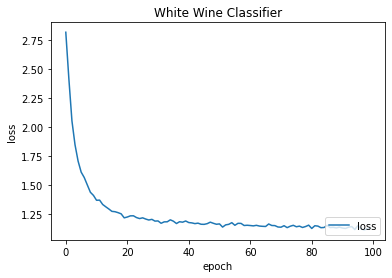

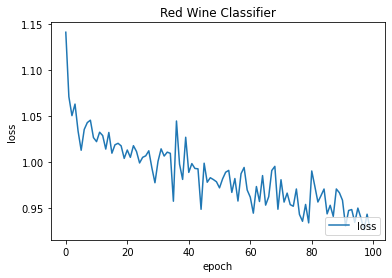

In [72]:
#결과 출력
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('White Wine Classifier')
plt.plot(hist1.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

plt.title('Red Wine Classifier')
plt.plot(hist2.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [0]:
whole_wine=pd.concat([white_wine,red_wine],ignore_index=True)

In [0]:
x_train, y_train, x_test, y_test = generate_data(whole_wine, 0.7)

In [0]:
# label을 one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,11);
y_test = to_categorical(y_test,11);

In [0]:
# x값 normalization
x_train, x_test = normalization(x_train,x_test)

In [110]:
##########################################################

import numpy as np
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import optimizers
from keras.layers import BatchNormalization, Dropout

n_in=11
n_out=11
p_keep=0.5 # 드롭아웃 확률의 비율

model = Sequential()

model.add(layers.Dense(units=512,input_dim=n_in, activation='relu'))
model.add(Dropout(p_keep))
model.add(BatchNormalization())  # Internal Covariate Shift 해결 - 각 layer이나 activation마다 input의 distribution이 달라지는 현상
model.add(layers.Dense(units=256,activation='relu'))
model.add(Dropout(p_keep))
model.add(BatchNormalization())
model.add(layers.Dense(units=128,activation='relu'))
model.add(Dropout(p_keep))
model.add(BatchNormalization())
model.add(layers.Dense(units=n_out,activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.0, nesterov=True)
#model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

epochs = 100
batch_size =150

# Whole  Wine Classifier
hist1=model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Whole Wine")
print("test loss: ", test_loss)
print("test accuracy: ", test_acc)

###########################################################

Epoch 1/100
1949/1949 [==============================] - 0s 195us/step - loss: 3.0426 - accuracy: 0.0995
Epoch 2/100
1949/1949 [==============================] - 0s 30us/step - loss: 2.8678 - accuracy: 0.1267
Epoch 3/100
1949/1949 [==============================] - 0s 32us/step - loss: 2.7482 - accuracy: 0.1349
Epoch 4/100
1949/1949 [==============================] - 0s 34us/step - loss: 2.6640 - accuracy: 0.1560
Epoch 5/100
1949/1949 [==============================] - 0s 31us/step - loss: 2.5722 - accuracy: 0.1862
Epoch 6/100
1949/1949 [==============================] - 0s 33us/step - loss: 2.4692 - accuracy: 0.2037
Epoch 7/100
1949/1949 [==============================] - 0s 30us/step - loss: 2.3703 - accuracy: 0.2263
Epoch 8/100
1949/1949 [==============================] - 0s 31us/step - loss: 2.2895 - accuracy: 0.2524
Epoch 9/100
1949/1949 [==============================] - 0s 35us/step - loss: 2.2271 - accuracy: 0.2673
Epoch 10/100
1949/1949 [==============================] - 0s 37

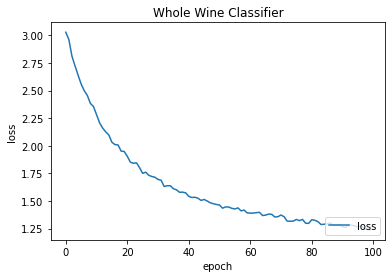

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Whole Wine Classifier')
plt.plot(hist1.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

실험용 - Random Forest 구현

In [0]:
x_train, y_train, x_test, y_test = generate_data(whole_wine, 0.7)

In [0]:
import numpy as np
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import optimizers
from keras.layers import Activation,BatchNormalization, Dropout, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier

a=1
def make_model():
  global a
  N = len(white_wine)
  n_in=11
  n_hiddens=32
  n_out=11
  p_keep=0.5 # 드롭아웃 확률의 비율

  model = Sequential()

  model.add(Dense(500*a,input_shape=(n_in,)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(100*a))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50*a))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(25*a))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(layers.Dense(units=n_out,activation='softmax'))
  a=a+1
  sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  return model

In [0]:
##########################################################

import numpy as np
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import optimizers
from keras.layers import Activation,BatchNormalization, Dropout, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import EnsembleVoteClassifier

epochs = 100

# 서로 다른 모델을 만들어 합치기 (Model Ensemble)
model1 = KerasClassifier(build_fn=make_model,epochs=epochs, verbose=0)
model1._estimator_type="classifier"
model2 = KerasClassifier(build_fn=make_model,epochs=epochs, verbose=0)
model2._estimator_type="classifier"
model3 = KerasClassifier(build_fn=make_model,epochs=epochs, verbose=0)
model3._estimator_type="classifier" 

ensemble_model=VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

# Whole Wine Classifier
ensemble_model.fit(x_train, y_train.values.ravel())
accuracy=ensemble_model.score(x_train,y_train.values.ravel())
###########################################################

In [118]:
print(accuracy)

0.5177013853258081


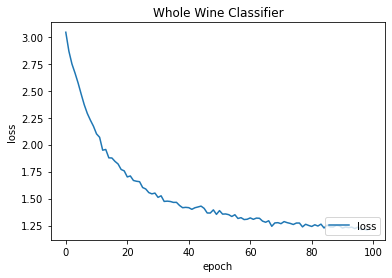

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Whole Wine Classifier')
plt.plot(hist1.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()